### Mean-Variance Optimization (MVO) and Behavioral Portfolio Theory (BPT) 

**Notes and code by Sanjiv Das**

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### DIVERSIFICATION OF A PORTFOLIO

It is useful to examine the power of using vector algebra with an application. Here we use vector and summation math to understand how diversification in stock portfolios works. Diversification occurs when we increase the number of non-perfectly correlated stocks in a portfolio, thereby reducing portfolio variance. In order to compute the variance of the portfolio we need to use the portfolio weights ${\bf w}$ and the covariance matrix of stock returns ${\bf R}$, denoted ${\bf \Sigma}$. We first write down the formula for a portfolio's return variance: 

\begin{equation}
Var(\boldsymbol{w'R}) = \boldsymbol{w'\Sigma w} = \sum_{i=1}^n \boldsymbol{w_i^2 \sigma_i^2}
+ \sum_{i=1}^n \sum_{j=1,i \neq j}^n \boldsymbol{w_i w_j \sigma_{ij}}
\end{equation}

Readers are strongly encouraged to implement this by hand for $n=2$ to convince themselves that the vector form of the expression for variance $\boldsymbol{w'\Sigma w}$ is the same thing as the long form on the right-hand side of the equation above. 
If returns are independent, then the formula collapses to: 

\begin{equation}
Var(\bf{w'R}) = \bf{w'\Sigma w} = \sum_{i=1}^n \boldsymbol{w_i^2 \sigma_i^2}
\end{equation}

If returns are dependent, and equal amounts are invested in
each asset ($w_i=1/n,\;\;\forall i$):

\begin{eqnarray*}
Var(\bf{w'R}) &=&  \frac{1}{n}\sum_{i=1}^n \frac{\sigma_i^2}{n}
+ \frac{n-1}{n}\sum_{i=1}^n \sum_{j=1,i \neq j}^n  \frac{\sigma_{ij}}{n(n-1)}\\
&=& \frac{1}{n} \bar{\sigma_i}^2 + \frac{n-1}{n} \bar{\sigma_{ij}}\\
&=& \frac{1}{n} \bar{\sigma_i}^2 + \left(1 - \frac{1}{n} \right) \bar{\sigma_{ij}}
\end{eqnarray*}

The first term is the average variance, denoted $\bar{\sigma_1}^2$ divided by $n$, and the second is the average covariance, denoted $\bar{\sigma_{ij}}$ multiplied by factor $(n-1)/n$. As $n \rightarrow \infty$,

\begin{equation}
Var({\bf w'R}) = \bar{\sigma_{ij}}
\end{equation}

This produces the remarkable result that in a well diversified portfolio, the variances of each stock's return does not matter at all for portfolio risk! Further the risk of the portfolio, i.e., its variance, is nothing but the average of off-diagonal terms in the covariance matrix. 

In [3]:
#THREE ASSETS

x = ones((3,3))
fill_diagonal(x,2)
x

array([[ 2.,  1.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  1.,  2.]])

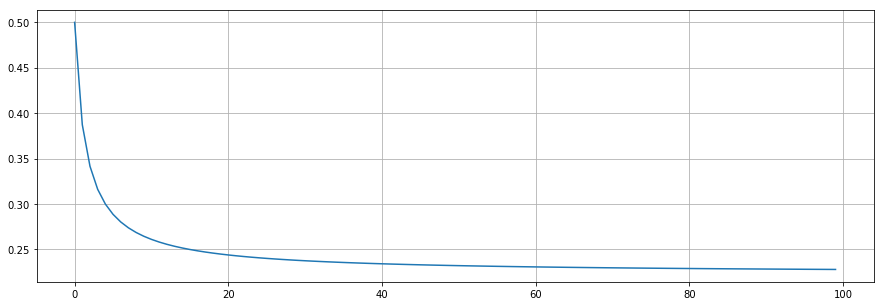

In [3]:
sd=0.50; cv=0.05; m=100
sd_p = zeros(m)
for j in range(m+1):
    cv_mat = ones((j,j))*cv
    fill_diagonal(cv_mat,sd**2)
    w = ones(j)/(1.0*j)
    sd_p[j-1] = sqrt(w.T.dot(cv_mat).dot(w))

rcParams['figure.figsize'] = 15,5
plot(sd_p)
grid()

### PORTFOLIO PROBLEM

We are interested in portfolios of $n$ assets, which have a mean return which we denote as $E(r_p)$, and a variance, denoted $Var(r_p)$.

Let $\underline{w} \in R^n$ be the portfolio weights. What this means is that we allocate each \$1 into various assets, such that the total of the weights sums up to 1. Note that we do not preclude short-selling, so that it is possible for weights to be negative as well. 

The optimization problem is defined as follows. We wish to find the portfolio that delivers the minimum variance (risk) while achieving a pre-specified level of expected (mean) return. 
\begin{equation}
\min_{\underline{w}} \quad \frac{1}{2}\: \underline{w}' \underline{\Sigma} \: \underline{w} 
\end{equation}
subject to 
\begin{eqnarray*}
\underline{w}'\:\underline{\mu} &=& E(r_p) \\
\underline{w}'\:\underline{1} &=& 1
\end{eqnarray*}
Note that we have a $\frac{1}{2}$ in front of the variance term above, which is for mathematical neatness as will become clear shortly. The minimized solution is not affected by scaling the objective function by a constant. 

The first constraint forces the expected return of the portfolio to a specified mean return, denoted $E(r_p)$, and the second constraint requires that the portfolio weights add up to 1, also known as the "fully invested" constraint. It is convenient that the constraints are equality constraints.  

#### SOLUTION:

This is a Lagrangian problem, and requires that we embed the constraints into the objective function using Lagrangian multipliers $\{\lambda_1, \lambda_2\}$. This results in the following minimization problem:
\begin{equation}
\min_{\underline{w}\, ,\lambda_1, \lambda_2} \quad L=\frac{1}{2}\:\underline{w}'\underline{\Sigma} \:\underline{w}+
\lambda_1[E(r_p)-\underline{w}'\underline{\mu}]+\lambda_2[1-\underline{w}'\underline{1}\;]
\end{equation}

To minimize this function, we take derivatives with respect to $\underline{w}$, $\lambda_1$, and $\lambda_2$, to arrive at the first order conditions:
\begin{eqnarray*}
\frac{\partial L}{\partial \underline{w}} &=& \underline{\Sigma}\:
\underline{w} - \lambda_1 \underline{\mu} - \lambda_2
\underline{1}= \underline{0} \qquad(1) \\
\\
\frac{\partial L}{\partial \lambda_1}
&=& E(r_p)-\underline{w}'\underline{\mu}= 0 \\
\\
\frac{\partial L}{\partial \lambda_2}
&=& 1-\underline{w}'\underline{1}= 0
\end{eqnarray*}


The first equation above, is a system of $n$ equations, because the derivative is taken with respect to every element of the vector $\underline{w}$. Hence, we have a total of $(n+2)$ first-order conditions. 
From (1)
\begin{eqnarray*}
\underline{w} &=& \Sigma^{-1}(\lambda_1\underline{\mu}+\lambda_2\underline{1}) \\
 &=& \lambda_1\Sigma^{-1}\underline{\mu}+\lambda_2\Sigma^{-1}\underline{1}
\quad(2)
\end{eqnarray*}

Premultiply (2) by $\underline{\mu}'$:
\begin{equation}
\underline{\mu}'\underline{w}=\lambda_1\underbrace{\,\underline{\mu}'\underline{\Sigma}^{-1}\underline{\mu}\,}_B+
\lambda_2\underbrace{\,\underline{\mu}'\underline{\Sigma}^{-1}\underline{1}\,}_A=E(r_p)
\end{equation}

Also premultiply (2) by $\underline{1}'$:
\begin{equation}
\underline{1}'\underline{w}=\lambda_1\underbrace{\,\underline{1}'\underline{\Sigma}^{-1}\underline{\mu}}_A+
\lambda_2\underbrace{\,\underline{1}'\underline{\Sigma}^{-1}\underline{1}}_C=1
\end{equation}

Solve for $\lambda_1, \lambda_2$
\begin{equation}
\lambda_1=\frac{CE(r_p)-A}{D}
\end{equation}

\begin{equation}
\lambda_2=\frac{B-AE(r_p)}{D}
\end{equation}

\begin{equation}
\mbox{where} \quad D=BC-A^2
\end{equation}

Note 1: Since $\underline{\Sigma}$ is positive definite,
$\underline{\Sigma}^{-1}$ is also positive definite: $B>0, C>0$.

Note 2: Given solutions for $\lambda_1, \lambda_2$, we solve for
$\underline{w}$.
\begin{equation}
\underline{w}=\underbrace{\;\frac{1}{D}\,[B\underline{\Sigma}^{-1}\underline{1}
-A\underline{\Sigma}^{-1}\underline{\mu}]}_{\underline{g}}+\underbrace{\;\frac{1}{D
}\,[C\underline{\Sigma}^{-1}\underline{\mu} -
A\underline{\Sigma}^{-1}\underline{1}\,]}_{\underline{h}}\cdot E(r_p)
\end{equation}
This is the expression for the optimal portfolio weights that minimize the variance for given expected return $E(r_p)$. We see that the vectors $\underline{g}$, $\underline{h}$ are fixed once we are given the inputs to the problem, i.e., $\underline{\mu}$ and $\underline{\Sigma}$. 

Note 3: We can vary $E(r_p)$ to get a set of frontier (efficient or optimal) portfolios \underline{w}.
\begin{equation}
\underline{w}=\underline{g}+\underline{h}\,E(r_p)
\end{equation}
\vspace{-0.3in}
\begin{eqnarray*}
if \quad E(r_p)&=& 0,\; \underline{w} = \underline{g} \\
if \quad E(r_p)&=& 1,\; \underline{w} = \underline{g}+\underline{h}
\end{eqnarray*}

Note that 
\begin{equation}
\underline{w}=\underline{g}+\underline{h}\,E(r_p)=[1-E(r_p)]\,\underline{g}+E(r_p)[\,\underline{g}+\underline{h}\:]
\end{equation}

Hence these 2 portfolios $\underline{g}, \underline{g} +
\underline{h}$ "generate" the entire frontier.


In [4]:
def markowitz(mu,cv,Er):
    n = len(mu)
    wuns = ones(n)
    cvinv = linalg.inv(cv)
    A = wuns.T.dot(cvinv).dot(mu)
    B = mu.T.dot(cvinv).dot(mu)
    C = wuns.T.dot(cvinv).dot(wuns)
    D = B*C - A*A
    lam = (C*Er-A)/D
    gam = (B-A*Er)/D
    wts = lam*(cvinv.dot(mu)) + gam*(cvinv.dot(wuns))
    return wts

In [5]:
#PARAMETERS
mu = array([0.02,0.10,0.20])
n = len(mu)
cv = array([0.0001,0,0,0,0.04,0.02,0,0.02,0.16])
cv = cv.reshape(n,n)
print(cv)

[[  1.00000000e-04   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   4.00000000e-02   2.00000000e-02]
 [  0.00000000e+00   2.00000000e-02   1.60000000e-01]]


In [6]:
Er = 0.15

#SOLVE PORTFOLIO PROBLEM
wts = markowitz(mu,cv,Er)
wts

array([-0.10315186,  0.68567335,  0.41747851])

In [7]:
print("Weights = ",wts)
print("Sum of weights = ",sum(wts))
print("Expected return = ",wts.T.dot(mu))
print("Std Dev of return = ",sqrt(wts.T.dot(cv).dot(wts)))

Weights =  [-0.10315186  0.68567335  0.41747851]
Sum of weights =  1.0
Expected return =  0.15
Std Dev of return =  0.241129148955


In [8]:
#NUMERICAL OPTIMIZATION
from scipy.optimize import minimize

def port_var(w,cv,mu,Er):
    return w.T.dot(cv).dot(w)

w0 = array([0.3,0.3,0.4])
cons = ({'type': 'eq', 'fun': lambda x:  sum(x)-1.0}, {'type': 'eq', 'fun': lambda x: x.T.dot(mu)-Er})
sol = minimize(port_var,w0,args=(cv,mu,Er),method="SLSQP",constraints=cons)
print(sol.x)
sol

[-0.10315184  0.68567331  0.41747853]


     fun: 0.058143266817619367
     jac: array([ -2.06301920e-05,   7.15530072e-02,   1.61020065e-01,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([-0.10315184,  0.68567331,  0.41747853])

In [9]:
#NUMERICAL OPTIMIZATION WITH NO SHORT SELLING
w0 = array([0.3,0.3,0.4])
cons = ({'type': 'eq', 'fun': lambda x:  sum(x)-1}, {'type': 'eq', 'fun': lambda x: x.T.dot(mu)-Er}, 
        {'type': 'ineq', 'fun': lambda x:  min(x)-0})
sol = minimize(port_var,w0,args=(cv,mu,Er),method="SLSQP",constraints=cons)
sol

     fun: 0.060000000089782547
     jac: array([ 0.  ,  0.06,  0.18,  0.  ])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ -3.46944695e-17,   4.99999999e-01,   5.00000001e-01])

In [10]:
ww = sol['x']
print('Expected return = ',ww.dot(mu))
print('Std dev = ',sqrt(ww.dot(cv).dot(ww)))

Expected return =  0.150000000075
Std dev =  0.244948974462


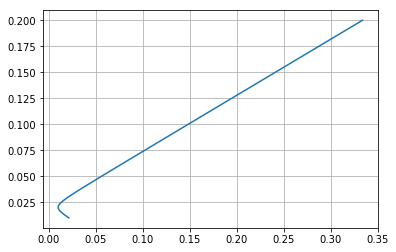

In [11]:
#TRACING OUT THE EFFICIENT FRONTIER
Er_vec = linspace(0.01,0.20,100)
Sig_vec = zeros(len(Er_vec))
j=0
for Er in Er_vec:
    wts = markowitz(mu,cv,Er)
    Sig_vec[j] = sqrt(wts.T.dot(cv).dot(wts))
    j=j+1
    
plot(Sig_vec,Er_vec)
grid()

         w1        w2        w3
0 -1.487868  0.110278  2.377590
1 -0.488387  0.936281  0.552107
2 -0.410712  1.049195  0.361516
3 -0.308848  0.560766  0.748082
4  0.857133 -1.126830  1.269697


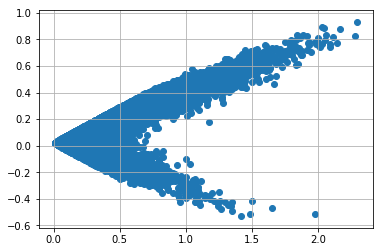

In [12]:
#SIMULATE THE EFFICIENT FRONTIER
import pandas as pd
n = 10000
w = pd.DataFrame(array(randn(2*n)).reshape(n,2))
w.columns = ["w1","w2"]
w["w3"] = 1-w["w1"]-w["w2"]
print(w.head())
Mu_ret = zeros(n)
Sd_ret = zeros(n)
for j in range(n):
    wt = w.ix[j]
    Mu_ret[j] = wt.T.dot(mu)
    Sd_ret[j] = sqrt(wt.T.dot(cv).dot(wt))

scatter(Sd_ret,Mu_ret)
grid()

### PORTFOLIO PROBLEM WITH RISKLESS ASSETS

We now enhance the portfolio problem to deal with risk less assets. The difference is that the fully-invested constraint is expanded to include the risk free asset. We require just a single equality constraint. The problem may be specified as follows.
\begin{equation}
\min_{\underline{w}} \quad \frac{1}{2}\: \underline{w}' \underline{\Sigma} \: \underline{w} 
\end{equation}

\begin{equation}
s.t. \quad \underline{w}'\underline{\mu}+(1-\underline{w}'\underline{1}\,)\,r_f=E(r_p)
\end{equation}

\begin{equation}
\min_{\underline{w}} \quad L = \frac{1}{2}\:\underline{w}'\underline{\Sigma} \:
\underline{w}+\lambda[E(r_p)-\underline{w}'\underline{\mu}-(1-\underline{w}'\underline{1})r_f]
\end{equation}

The first-order conditions for the problem are as follows. 
\begin{eqnarray*}
\frac{\partial L}{\partial \underline{w}}&=& \underline{\Sigma} \:
\underline{w} - \lambda \underline{\mu}+\lambda\,\underline{1}\,r_f=\underline{0}\\
\frac{\partial L}{\partial
\lambda}&=& E(r_p)-\underline{w}'\underline{\mu}-(1-\underline{w}'\underline{1})\,r_f=0
\end{eqnarray*}

Re-aranging, and solving for $\underline{w}$ and $\lambda$, we get the following manipulations, eventually leading to the desired solution. 
\begin{eqnarray*}
\underline{\Sigma} \:
\underline{w}&=& \lambda(\underline{\mu}-\underline{1}\:r_f)\\
E(r_p)-r_f&=& \underline{w}'(\underline{\mu}-\underline{1}\:r_f)
\end{eqnarray*}

Take the first equation and proceed as follows:
\begin{eqnarray*}
\underline{w}&=& \lambda \underline{\Sigma}^{-1} (\underline{\mu}-\underline{1}\:r_f)\\
E(r_p)-r_f \equiv (\underline{\mu} - \underline{1} r_f)' \underline{w}&=& \lambda (\underline{\mu} - \underline{1} r_f)' \underline{\Sigma}^{-1} (\underline{\mu}-\underline{1}\:r_f)\\
\end{eqnarray*}

The first and third terms in the equation above then give that 
\begin{equation}
\lambda = \frac{E(r_p)-r_f}{(\underline{\mu} - \underline{1} r_f)' \underline{\Sigma}^{-1} (\underline{\mu}-\underline{1}\:r_f)}
\end{equation}

Substituting this back into the first foc results in the final solution. 
\begin{equation}
\underline{w}=\underline{\Sigma}^{-1}(\underline{\mu}-\underline{1}\:r_f)\frac{E(r_p)-r_f}{H}
\end{equation}

\begin{equation}
\mbox{where} \quad H=(\underline{\mu}-r_f\underline{1}\:)'\underline{\Sigma}^{-1}(\underline{\mu}-r_f\underline{1}\:)
\end{equation}

In [13]:
def markowitz2(mu,cv,Er,rf):
    n = len(mu)
    wuns = ones(n)
    x = mu - rf*wuns
    cvinv = linalg.inv(cv)
    H = x.T.dot(cvinv).dot(x)
    wts = cvinv.dot(x) * (Er-rf)/H
    return wts

In [14]:
#PARAMETERS
mu = array([0.02,0.10,0.20])
n = len(mu)
cv = array([0.0001,0,0,0,0.04,0.02,0,0.02,0.16])
cv = cv.reshape(n,n)
Er = 0.10
rf = 0.01

sol = markowitz2(mu,cv,Er,rf)
print("Wts in stocks",sol)
print("Wts in risk free asset",1-sum(sol))
print("Exp return", rf + sol.T.dot(mu-rf))
print("Std Dev of return", sqrt(sol.T.dot(cv).dot(sol)))

Wts in stocks [ 6.70307845  0.11842105  0.06479643]
Wts in risk free asset -5.8862959285
Exp return 0.1
Std Dev of return 0.0776709122243


## MENTAL ACCOUNTS AND PORTFOLIO OPTIMIZATION

See the paper by Das, Markowitz, Scheid, and Statman (2010) in the *Journal of Financial and Quantitative Analysis*. It may be downloaded here: http://journals.cambridge.org/repo_A772rEdS 

### PROBLEM AND SOLUTION

This is from Das, Markowitz, Scheid, Statman (JFQA 2010).

\begin{equation}
\max_{\bf w} {\bf w}^{\top} \mu - \frac{\gamma}{2} {\bf w}^{\top} \Sigma {\bf w}
\end{equation}

subject to 

\begin{equation}
{\bf w}^{\top} {\bf 1} = 1, \quad \quad \quad {\bf 1} = [1, 1, 1, ..., 1]^{\top} \in {\cal R}^n
\end{equation}

The solution is: 

\begin{equation}
{\bf w} = \frac{1}{\gamma} \Sigma^{-1} \left[\mu - \left(\frac{{\bf 1}^{\top} \Sigma^{-1} \mu - \gamma}{{\bf 1}^{\top} \Sigma^{-1} {\bf 1}} \right) {\bf 1} \right] \in {\cal R}^n
\end{equation}

*Proof*: To solve this maximization problem, we set up the Lagrangian with coefficient $\lambda$:

\begin{equation}
max_{{\bf w},\lambda} L = {\bf w}^{\top} \mu - \frac{\gamma}{2} {\bf w}^{\top} \Sigma {\bf w} + \lambda [1 - {\bf w}^{\top} {\bf 1}]
\end{equation}

The first-order conditions are:

\begin{eqnarray}
\frac{\partial L}{\partial {\bf w}} &=& \mu - \gamma \Sigma {\bf w} - \lambda {\bf 1} = {\bf 0} \\
\frac{\partial L}{\partial \lambda} &=& 1 - {\bf w}^{\top} {\bf 1} = 0 
\end{eqnarray}

Note that the first equation above is a system of $n$ equations. Reaaranging the equation gives:

\begin{equation}
\Sigma {\bf w} = \frac{1}{\gamma} [\mu - \lambda {\bf 1}]
\end{equation}

and premultiplying both sides of this equation by $\Sigma^{-1}$ results in

\begin{equation}
{\bf w} = \frac{1}{\gamma}\Sigma^{-1} [\mu - \lambda {\bf 1}] \quad \quad \quad (EQN_W)
\end{equation}

To solve for $\lambda$ premultiply the previous equation by ${\bf 1}^{\top}$ to get

\begin{equation}
{\bf 1}^{\top} {\bf w} = \frac{1}{\gamma}{\bf 1}^{\top}\Sigma^{-1} [\mu - \lambda {\bf 1}]
\end{equation}

This can now be solved for $\lambda$:

\begin{equation}
\lambda = \frac{{\bf 1}^{\top}\Sigma^{-1} \mu - \gamma}{{\bf 1}^{\top}\Sigma^{-1} {\bf 1}}
\end{equation}

Plugging $\lambda$ back into equation (EQN_W) gives the final solution as noted before:

\begin{equation}
{\bf w} = \frac{1}{\gamma} \Sigma^{-1} \left[\mu - \left(\frac{{\bf 1}^{\top} \Sigma^{-1} \mu - \gamma}{{\bf 1}^{\top} \Sigma^{-1} {\bf 1}} \right) {\bf 1} \right] \in {\cal R}^n
\end{equation}


### EXAMPLE

Let's use an example of a portfolio of three securities. 

| Security | Expected Returns | Standard Deviations |
|:--------:|:----------------:|:-------------------:|
| Bond     | 5%               | 5%                  |
| Low-risk stock | 10%        | 20%                 |
|High-risk stock | 25%        | 50%                 |

The correlation between the two stocks is 0.20, and all other correlations are zero. 

Assume the investor has separate goals and sub-portfolios: 

| Goal (subportfolio) | Current allocation | Time Horizon | Annualized Return goal | Total Accumulation goal | 
|:-------------------:|:------------------:|:------------:|:----------------------:|------------------------:|
| Bequest             | \$200,000          | 25 years     | 26.35%                 | \$69,248,625 | 
| Education           | \$200,000          | 3 years      | 12.18%                 | \$282,343 | 
| Retirement Account  | \$600,000          | 15 years     | 10.23%                 | \$2,586,118 | 

Solve these individual portfolio problems.

In [15]:
mu = array([0.05, 0.10, 0.25])
print(mu)
Sigma = zeros((3,3))
Sigma[0,0]=0.05**2; Sigma[1,1]=0.20**2; Sigma[2,2]=0.50**2
Sigma[0,1]=Sigma[1,0]=Sigma[0,2]=Sigma[2,0]=0.0
Sigma[1,2]=Sigma[2,1]=0.20*0.20*0.50
Sigma

[ 0.05  0.1   0.25]


array([[ 0.0025,  0.    ,  0.    ],
       [ 0.    ,  0.04  ,  0.02  ],
       [ 0.    ,  0.02  ,  0.25  ]])

In [16]:
def Mwts(mu,Sigma,gamma):
    n = len(mu)
    wuns = ones(n)
    Sinv = linalg.inv(Sigma)
    x1 = wuns.T.dot(Sinv).dot(mu) - gamma
    x2 = wuns.T.dot(Sinv).dot(wuns)
    w = Sinv.dot(mu - (x1/x2)*wuns)/gamma
    return w

In [17]:
#Retirement subportfolio
gamma = 3.7950
wts1 = Mwts(mu,Sigma,gamma)
print("Weights = ",wts1)
print("Expected Return = ",wts1.dot(mu))
print("Std Dev Return = ",sqrt(wts1.dot(Sigma).dot(wts1)))

Weights =  [ 0.53943066  0.26562102  0.19494831]
Expected Return =  0.102270713943
Std Dev Return =  0.122972154644


In [18]:
#Education subportfolio
gamma = 2.7063
wts2 = Mwts(mu,Sigma,gamma)
print("Weights = ",wts2)
print("Expected Return = ",wts2.dot(mu))
print("Std Dev Return = ",sqrt(wts2.dot(Sigma).dot(wts2)))

Weights =  [ 0.37874065  0.34985369  0.27140566]
Expected Return =  0.121773816361
Std Dev Return =  0.165734318139


In [19]:
#Bequest subportfolio
gamma = 0.8773
wts3 = Mwts(mu,Sigma,gamma)
print("Weights = ",wts3)
print("Expected Return = ",wts3.dot(mu))
print("Std Dev Return = ",sqrt(wts3.dot(Sigma).dot(wts3)))

Weights =  [-0.78903125  0.96199219  0.82703906]
Expected Return =  0.263507421777
Std Dev Return =  0.491320864316


In [20]:
#Combined portfolio
wts = 0.6*wts1+0.2*wts2+0.2*wts3
print(wts)

[ 0.24160028  0.42174179  0.33665793]


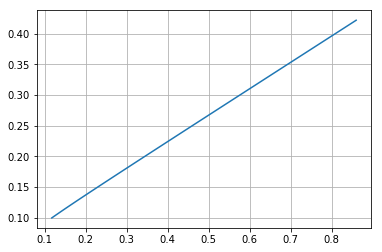

In [21]:
#GENERATE MEAN-VARIANCE FRONTIER USING gamma (risk aversion)
m = 25
gammas = linspace(0.5,4,m)
Er = zeros(m)
Sdr = zeros(m)
j = 0
for gamma in gammas:
    w = Mwts(mu,Sigma,gamma)
    Er[j] = w.T.dot(mu)
    Sdr[j] = sqrt(w.T.dot(Sigma).dot(w))
    j = j+1

plot(Sdr,Er)
grid()

In [22]:
import pandas as pd
data = array([gammas,Er,Sdr])
data = data.T
df = pd.DataFrame(data)
df.columns = ["Gamma","Exp Return","SD Return"]
df

,Gamma,Exp Return,SD Return
0,0.500000,0.421760,0.859237
1,0.645833,0.338670,0.665922
2,0.791667,0.286192,0.543975
3,0.937500,0.250041,0.460089
4,1.083333,0.223622,0.398893
5,1.229167,0.203473,0.352311
6,1.375000,0.187597,0.315692
7,1.520833,0.174766,0.286170
8,1.666667,0.164181,0.261881
9,1.812500,0.155299,0.241562


### CONNECTING MVT WITH BPT

The Behavioral Portfolio Theory (BPT) optimization is as follows:

\begin{equation}
\max_{\bf w} {\bf w}^{\top} \mu, \quad \quad s.t. \quad \mbox{Prob}[r \leq H] \leq \alpha
\end{equation}

For normal returns $r$, the constraint may be stated explicitly as

\begin{equation}
H \leq {\bf w}^{\top} \mu + \Phi^{-1}(\alpha)[{\bf w}^{\top} {\bf \Sigma} {\bf w}]^{1/2}
\end{equation}

The easy way to solve for the optimal weights is to search for the value of $\gamma$ such that the optimal ${\bf w}(\gamma)$ satisfies the optimality equation above:

\begin{equation}
{\bf w}(\gamma) = \frac{1}{\gamma} \Sigma^{-1} \left[\mu - \left(\frac{{\bf 1}^{\top} \Sigma^{-1} \mu - \gamma}{{\bf 1}^{\top} \Sigma^{-1} {\bf 1}} \right) {\bf 1} \right] \in {\cal R}^n
\end{equation}

and satisfies the constraint: 

\begin{equation}
H \leq {\bf w}(\gamma)^{\top} \mu + \Phi^{-1}(\alpha)[{\bf w}(\gamma)^{\top} {\bf \Sigma} {\bf w}(\gamma)]^{1/2}
\end{equation}


In [23]:
#BEHAVIORAL PORTFOLIO OPTIMIZATION
#H: threshold return
#alpha: probability of not meeting H
#Returns: gamma and wts

from scipy.optimize import fsolve
from scipy.stats import norm

def solve_gamma(gamma,mu,Sigma,H,alpha):
    w = Mwts(mu,Sigma,gamma)
    res = w.T.dot(mu) + norm.ppf(alpha)*sqrt(w.dot(Sigma).dot(w)) - H
    return res

def Bwts(mu,Sigma,H,alpha):
    gamma = fsolve(solve_gamma,2.0,args=(mu,Sigma,H,alpha))
    print("gamma=",gamma)
    wts = Mwts(mu,Sigma,gamma)
    return wts

In [24]:
H=-0.10; alpha=0.05
wts = Bwts(mu,Sigma,H,alpha)
print("Weights = ",wts)
print("Expected Return = ",wts.dot(mu))
print("Std Dev Return = ",sqrt(wts.dot(Sigma).dot(wts)))

gamma= [ 3.7950149]
Weights =  [ 0.53943223  0.2656202   0.19494757]
Expected Return =  0.10227052356
Std Dev Return =  0.122971746693


In [25]:
H=-0.05; alpha=0.15
wts = Bwts(mu,Sigma,H,alpha)
print("Weights = ",wts)
print("Expected Return = ",wts.dot(mu))
print("Std Dev Return = ",sqrt(wts.dot(Sigma).dot(wts)))

gamma= [ 2.70626249]
Weights =  [ 0.37873288  0.34985776  0.27140935]
Expected Return =  0.121774758764
Std Dev Return =  0.165736419249


In [26]:
H=-0.15; alpha=0.20
wts = Bwts(mu,Sigma,H,alpha)
print("Weights = ",wts)
print("Expected Return = ",wts.dot(mu))
print("Std Dev Return = ",sqrt(wts.dot(Sigma).dot(wts)))

gamma= [ 0.87729407]
Weights =  [-0.78904293  0.96199831  0.82704462]
Expected Return =  0.263508838881
Std Dev Return =  0.491324151989


### NUMERICAL OPTIMIZATION WITH CONSTRAINTS IN BPT

In [27]:
#NUMERICAL OPTIMIZATION WITH CONSTRAINTS
from scipy.optimize import minimize

def port_Util(w,mu,Sigma,H,alpha):
    return -1.0*w.T.dot(mu) + 0.5*w.T.dot(Sigma).dot(w)

w0 = array([0.3,0.3,0.4])
n = len(w0)
L=0.0; U=1.0;
cons = ({'type': 'eq', 'fun': lambda x:  sum(x)-1.0}, 
        {'type': 'ineq', 'fun': lambda x: x.T.dot(mu)+norm.ppf(alpha)*sqrt(x.dot(Sigma).dot(x)) - H}, 
        {'type': 'ineq', 'fun': lambda x: x - L},
        {'type': 'ineq', 'fun': lambda x: U - x})

In [28]:
H=-0.10; alpha=0.05
sol = minimize(port_Util,w0,args=(mu,Sigma,H,alpha),method="SLSQP",constraints=cons)
wts = sol.x
print("Weights = ",wts)
print("Expected Return = ",wts.dot(mu))
print("Std Dev Return = ",sqrt(wts.dot(Sigma).dot(wts)))

Weights =  [ 0.53946357  0.26557838  0.19495805]
Expected Return =  0.102270529537
Std Dev Return =  0.122971759833


In [29]:
H=-0.05; alpha=0.15
sol = minimize(port_Util,w0,args=(mu,Sigma,H,alpha),method="SLSQP",constraints=cons)
wts = sol.x
print("Weights = ",wts)
print("Expected Return = ",wts.dot(mu))
print("Std Dev Return = ",sqrt(wts.dot(Sigma).dot(wts)))

Weights =  [ 0.37873289  0.34985775  0.27140936]
Expected Return =  0.121774758852
Std Dev Return =  0.165736419443


In [30]:
H=-0.15; alpha=0.20
sol = minimize(port_Util,w0,args=(mu,Sigma,H,alpha),method="SLSQP",constraints=cons)
wts = sol.x
print("Weights = ",wts)
print("Expected Return = ",wts.dot(mu))
print("Std Dev Return = ",sqrt(wts.dot(Sigma).dot(wts)))

Weights =  [ -6.91064715e-17   3.19999998e-01   6.80000002e-01]
Expected Return =  0.202000000355
Std Dev Return =  0.358329458335
